In [2]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# other
import re

In [3]:
df = pd.read_csv('Salaries.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [5]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [22]:
df['JobTitle'].value_counts()

Transit Operator                            7036
Special Nurse                               4389
Registered Nurse                            3736
Public Svc Aide-Public Works                2518
Police Officer 3                            2421
Custodian                                   2418
TRANSIT OPERATOR                            2388
Firefighter                                 2359
Recreation Leader                           1971
Patient Care Assistant                      1945
Deputy Sheriff                              1933
Police Officer                              1476
SPECIAL NURSE                               1402
Public Service Trainee                      1328
REGISTERED NURSE                            1219
Police Officer 2                            1141
Attorney (Civil/Criminal)                   1126
Porter                                      1095
Sergeant 3                                  1047
General Laborer                             1033
EMT/Paramedic/Firefi

In [15]:
df['JobTitle'].shape

(148654,)

In [21]:
uniquejobs=df['JobTitle'].unique()

In [13]:
len(uniquejobs)

2159

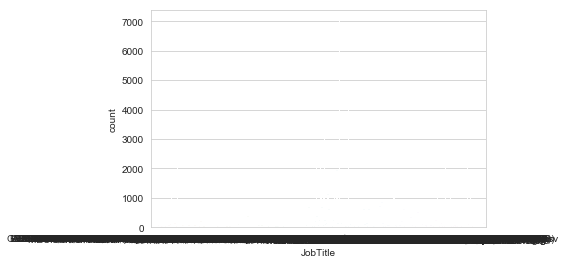

In [19]:
sns.countplot(df['JobTitle'])

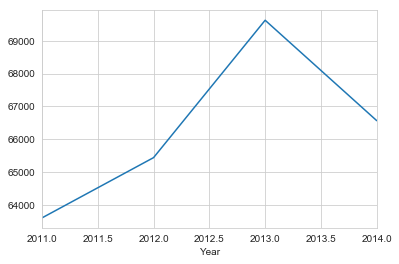

In [7]:
# what was the trend for mean base pay?
df.groupby('Year').mean()['BasePay'].plot()

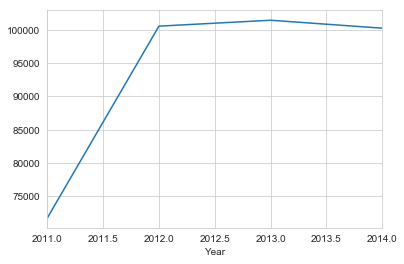

In [82]:
# How about total pay?
df.groupby('Year').mean()['TotalPayBenefits'].plot()

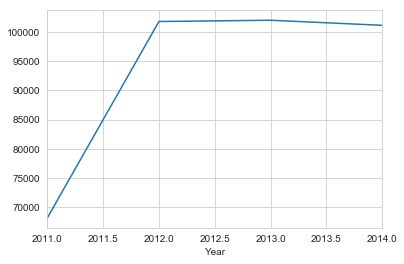

In [94]:
# How about median?
df.groupby('Year').median()['TotalPayBenefits'].plot()

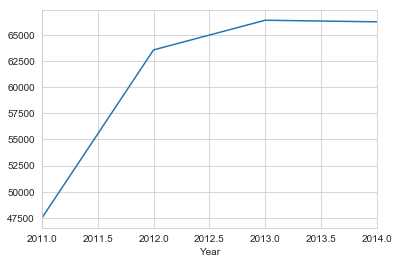

In [93]:
# What about Standard Dev?
df.groupby('Year').std()['TotalPayBenefits'].plot()

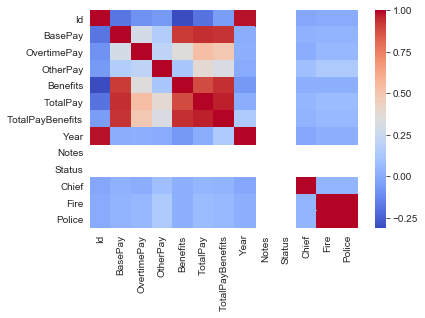

In [170]:
# Heatmap on Base Pay < 100000 - does it correlate to other types of pay?
sns.heatmap(df[df['BasePay']< 100000].corr(),cmap='coolwarm')

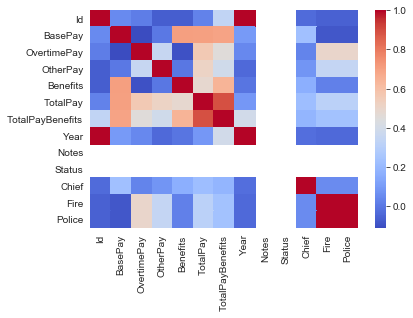

In [178]:
# Heatmap on Base Pay > 100000 - does it correlate to other types of pay?
sns.heatmap(df[df['BasePay']> 100000].corr(),cmap='coolwarm')

**Comparing Mean Police to Fire Payment Types**

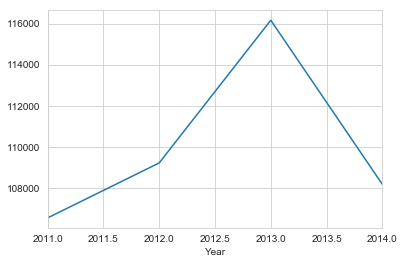

In [100]:
df[df['JobTitle'].str.contains('FIRE', flags=re.IGNORECASE, regex=True)].groupby('Year')['BasePay'].mean().plot()

In [106]:
# police or fire department
def ispolice(title):
    if 'police' in title.lower():
        return True
    else:
        return False
def isfire(title):
    if 'fire' in title.lower():
        return True
    else:
        return False

In [108]:
df['Fire'] = df['JobTitle'].apply(lambda x: isfire(x))
df['Police'] = df['JobTitle'].apply(lambda x: isfire(x))

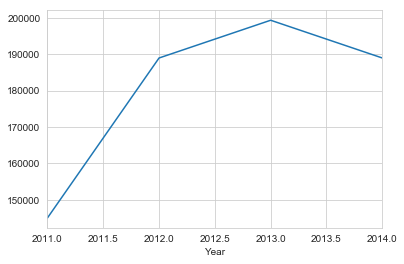

In [116]:
df[df['Fire']].groupby('Year')['TotalPayBenefits'].mean().plot()

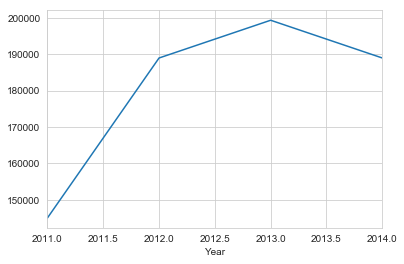

In [115]:
df[df['Police']].groupby('Year')['TotalPayBenefits'].mean().plot()

In [124]:
df[df['Police']].groupby('Year')['TotalPayBenefits'].mean()

Year
2011    145005.665483
2012    188965.059496
2013    199341.344856
2014    188972.082912
Name: TotalPayBenefits, dtype: float64

Year by year:
They correlate so closely that there's not an easy visual difference

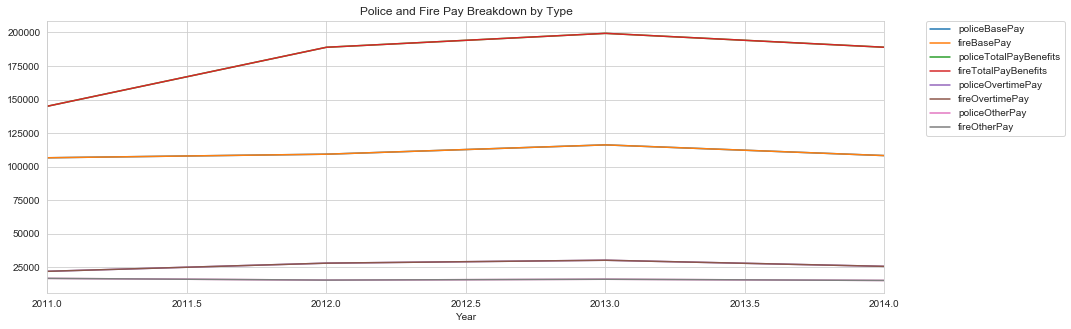

In [180]:
pay=['BasePay','TotalPayBenefits','OvertimePay','OtherPay']
for p in pay:
    df[df['Police']].groupby('Year')[p].mean().plot(label='police'+p,figsize=(15,5))
    df[df['Fire']].groupby('Year')[p].mean().plot(label='fire'+p,figsize=(15,5))
    plt.title(f'Police and Fire Pay Breakdown by Type')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Do Police and Firemen make more money? Yes, they do.

In [137]:
df[['Police','BasePay']].corr()

,Police,BasePay
Police,1.000000,0.207256
BasePay,0.207256,1.000000


In [138]:
df[['Fire','BasePay']].corr()

,Fire,BasePay
Fire,1.000000,0.207256
BasePay,0.207256,1.000000


In [135]:
df[['Police','TotalPayBenefits']].corr()

,Police,TotalPayBenefits
Police,1.000000,0.280957
TotalPayBenefits,0.280957,1.000000


In [162]:
df[['Fire','TotalPayBenefits']].corr()

,Fire,TotalPayBenefits
Fire,1.000000,0.280957
TotalPayBenefits,0.280957,1.000000


**Visualizing the correlation**

In [176]:
df[df['Police']].corr().style.background_gradient(cmap='coolwarm')

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status,Chief,Fire,Police
Id,1,-0.106431,-0.031203,-0.10014,-0.0854225,-0.112141,0.102839,0.984758,nan,nan,-0.0449398,nan,nan
BasePay,-0.106431,1,0.330401,0.174267,0.941949,0.838164,0.8347,0.0397971,nan,nan,0.276817,nan,nan
OvertimePay,-0.031203,0.330401,1,0.166446,0.392893,0.746941,0.697949,0.0573193,nan,nan,0.0958116,nan,nan
OtherPay,-0.10014,0.174267,0.166446,1,0.230898,0.414588,0.358939,-0.0393443,nan,nan,0.233983,nan,nan
Benefits,-0.0854225,0.941949,0.392893,0.230898,1,0.83938,0.885725,0.142146,nan,nan,0.188839,nan,nan
TotalPay,-0.112141,0.838164,0.746941,0.414588,0.83938,1,0.961102,0.0412339,nan,nan,0.268238,nan,nan
TotalPayBenefits,0.102839,0.8347,0.697949,0.358939,0.885725,0.961102,1,0.255388,nan,nan,0.236401,nan,nan
Year,0.984758,0.0397971,0.0573193,-0.0393443,0.142146,0.0412339,0.255388,1,nan,nan,-0.0309849,nan,nan
Notes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Status,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


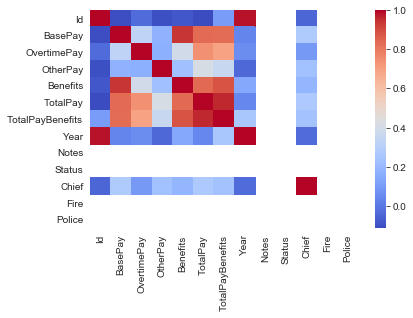

In [160]:
sns.heatmap(df[df['Police']].corr(),cmap='coolwarm')

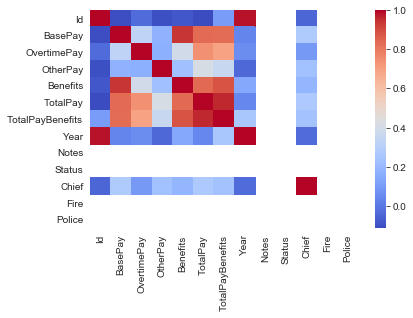

In [161]:
sns.heatmap(df[df['Fire']].corr(),cmap='coolwarm')

**How does seniority factor in?**

In [21]:
def ischief(title):
    if 'chief' in title.lower():
        return True
    else:
        return False

In [26]:
df['Chief'] = df['JobTitle'].apply(lambda x: chief_string(x))

In [28]:
df['Chief'].value_counts()

False    148027
True        627
Name: Chief, dtype: int64

In [18]:
df[df['BasePay'] > 1000]['BasePay'].head()

0    167411.18
1    155966.02
2    212739.13
3     77916.00
4    134401.60
Name: BasePay, dtype: float64

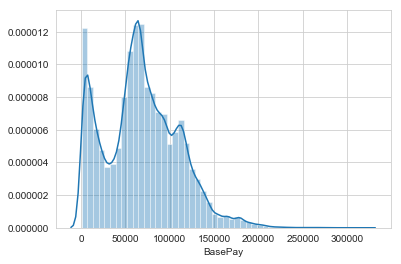

In [19]:
sns.distplot(df[df['BasePay'] > 1000]['BasePay'])

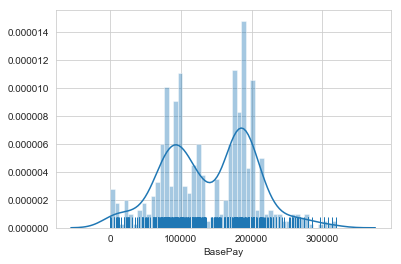

In [36]:
sns.distplot(df[df['Chief']]['BasePay'].dropna(), bins=50, rug=True, kde=True)

In [41]:
deprecate=['Clerk','Assistant']

In [83]:
df[df['JobTitle'].str.contains('Chief') & ~df['JobTitle'].str.contains('Clerk')].head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,chief,Chief
36160,36161,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,NaN,San Francisco,NaN,True,True
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,NaN,San Francisco,NaN,True,True
36169,36170,Brendan Ward,"Battlion Chief, Fire Suppressi",174822.47,118215.58,28845.78,49648.09,321883.83,371531.92,2012,NaN,San Francisco,NaN,True,True


In [84]:
df[~df['JobTitle'].isin(deprecate) & df['Chief']].head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,chief,Chief
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,True,True
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.0,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN,True,True
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN,True,True


In [43]:
services = ['FIRE','POLICE']

In [56]:
df[df['JobTitle'].str.contains('FIRE', flags=re.IGNORECASE, regex=True)].shape

(5879, 15)

**How does BasePay compare between Police and Firemen?**

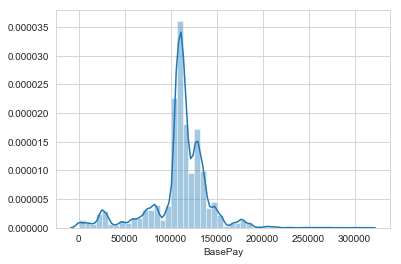

In [67]:
sns.distplot(df[df['JobTitle'].str.contains('FIRE', flags=re.IGNORECASE, regex=True)]['BasePay'].dropna())

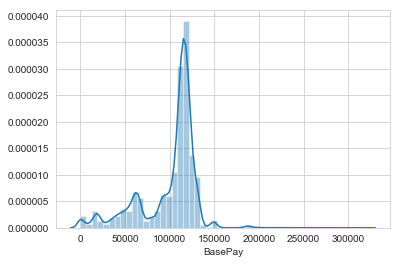

In [74]:
sns.distplot(df[df['JobTitle'].str.contains('POLICE', flags=re.IGNORECASE, regex=True)]['BasePay'].dropna())

**How about TotalPay?**

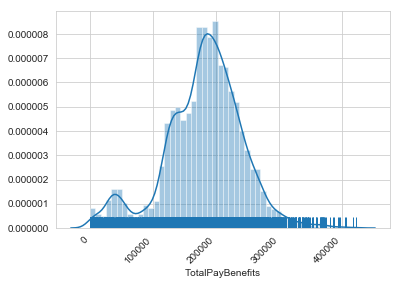

In [77]:
plt.xticks(rotation=45, ha='right')
sns.distplot(df[df['JobTitle'].str.contains('FIRE', flags=re.IGNORECASE, regex=True)]['TotalPayBenefits'].dropna(), bins=50, rug=True)

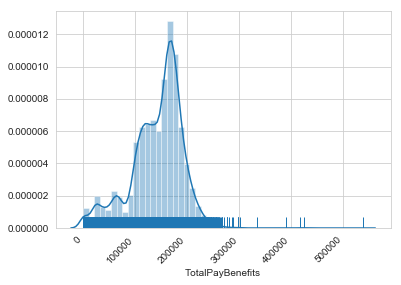

In [76]:
plt.xticks(rotation=45, ha='right')
sns.distplot(df[df['JobTitle'].str.contains('POLICE', flags=re.IGNORECASE, regex=True)]['TotalPayBenefits'].dropna(), bins=50, rug=True)

In [79]:
policepay = df[df['JobTitle'].str.contains('POLICE', flags=re.IGNORECASE, regex=True)]['TotalPayBenefits'].copy()

In [80]:
firepay = df[df['JobTitle'].str.contains('FIRE', flags=re.IGNORECASE, regex=True)]['TotalPayBenefits'].dropna()

In [81]:
# Is there a correlation between being a chief and making more money?
df[['Chief','TotalPayBenefits']].corr()

,Chief,TotalPayBenefits
Chief,1.000000,0.108508
TotalPayBenefits,0.108508,1.000000


In [149]:
df.drop(['chief'],inplace=True, axis=1)

In [156]:
df[df['Chief']].corr().style.background_gradient(cmap='coolwarm')

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status,Chief,Fire,Police
Id,1,0.0100584,-0.0336728,-0.0378922,-0.146138,-0.0262271,0.14436,0.980736,nan,nan,nan,-0.0826654,-0.0826654
BasePay,0.0100584,1,0.146044,-0.109649,0.933726,0.819168,0.844418,0.166894,nan,nan,nan,0.210971,0.210971
OvertimePay,-0.0336728,0.146044,1,0.201817,0.202203,0.5188,0.47216,0.0275259,nan,nan,nan,0.708388,0.708388
OtherPay,-0.0378922,-0.109649,0.201817,1,-0.179588,0.382498,0.295671,0.0016127,nan,nan,nan,0.276173,0.276173
Benefits,-0.146138,0.933726,0.202203,-0.179588,1,0.765552,0.83968,0.0800553,nan,nan,nan,0.20634,0.20634
TotalPay,-0.0262271,0.819168,0.5188,0.382498,0.765552,1,0.970012,0.140553,nan,nan,nan,0.500137,0.500137
TotalPayBenefits,0.14436,0.844418,0.47216,0.295671,0.83968,0.970012,1,0.309699,nan,nan,nan,0.442725,0.442725
Year,0.980736,0.166894,0.0275259,0.0016127,0.0800553,0.140553,0.309699,1,nan,nan,nan,-0.0210783,-0.0210783
Notes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Status,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


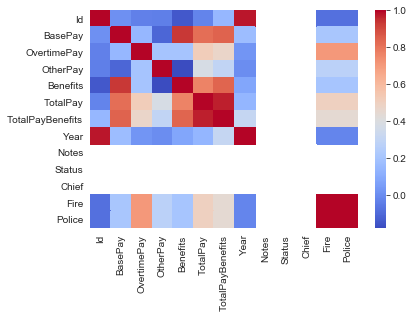

In [171]:
sns.heatmap(df[df['Chief']].corr(),cmap='coolwarm')